In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("thyroid_data.csv")

In [3]:
data.head()


,S.no,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,...,TSH,T3 Measured,T3,TT4 Measured,TT4,T4U Measured,T4U,FTI Measured,FTI,Category
0,0,41,F,f,f,f,f,f,f,f,...,1.3,t,2.5,t,125,t,1.14,t,109,negative
1,1,23,F,f,f,f,f,f,f,f,...,4.1,t,2,t,102,f,?,f,?,negative
2,2,46,M,f,f,f,f,f,f,f,...,0.98,f,?,t,109,t,0.91,t,120,negative
3,3,70,F,t,f,f,f,f,f,f,...,0.16,t,1.9,t,175,f,?,f,?,negative
4,4,70,F,f,f,f,f,f,f,f,...,0.72,t,1.2,t,61,t,0.87,t,70,negative


In [ ]:
data.columns

Index(['S.no', 'Age', 'Sex', 'On Thyroxine', 'Query on Thyroxine',
       'On Antithyroid Medication', 'Sick', 'Pregnant', 'Thyroid Surgery',
       'I131 Treatment', 'Query Hypothyroid', 'Query Hyperthyroid', 'Lithium',
       'Goitre', 'Tumor', 'Hypopituitary', 'Psych', 'TSH Measured', 'TSH',
       'T3 Measured', 'T3', 'TT4 Measured', 'TT4', 'T4U Measured', 'T4U',
       'FTI Measured', 'FTI', 'Category'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   S.no                       3221 non-null   int64 
 1   Age                        3221 non-null   object
 2   Sex                        3221 non-null   object
 3   On Thyroxine               3221 non-null   object
 4   Query on Thyroxine         3221 non-null   object
 5   On Antithyroid Medication  3221 non-null   object
 6   Sick                       3221 non-null   object
 7   Pregnant                   3221 non-null   object
 8   Thyroid Surgery            3221 non-null   object
 9   I131 Treatment             3221 non-null   object
 10  Query Hypothyroid          3221 non-null   object
 11  Query Hyperthyroid         3221 non-null   object
 12  Lithium                    3221 non-null   object
 13  Goitre                     3221 non-null   object
 14  Tumor   

In [ ]:
data = data.drop(["S.no","TSH Measured","T3 Measured","TT4 Measured","T4U Measured","FTI Measured"],axis = 1)

In [ ]:
data["Age"] = data["Age"].replace("?", np.nan)
data["TSH"] = data["TSH"].replace("?", np.nan)
data["T3"] = data["T3"].replace("?", np.nan)
data["T4U"] = data["T4U"].replace("?", np.nan)
data["FTI"] = data["FTI"].replace("?", np.nan)
data["TT4"] = data["TT4"].replace("?", np.nan)
data["Sex"] = data["Sex"].replace("?", "F")


In [ ]:
data["TT4"] = data["TT4"].astype("float")
data["Age"] = data["Age"].astype("float")
data["TSH"] = data["TSH"].astype("float")
data["T4U"] = data["T4U"].astype("float")
data["FTI"] = data["FTI"].astype("float")
data["T3"] = data["T3"].astype("float")


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        3220 non-null   float64
 1   Sex                        3221 non-null   object 
 2   On Thyroxine               3221 non-null   object 
 3   Query on Thyroxine         3221 non-null   object 
 4   On Antithyroid Medication  3221 non-null   object 
 5   Sick                       3221 non-null   object 
 6   Pregnant                   3221 non-null   object 
 7   Thyroid Surgery            3221 non-null   object 
 8   I131 Treatment             3221 non-null   object 
 9   Query Hypothyroid          3221 non-null   object 
 10  Query Hyperthyroid         3221 non-null   object 
 11  Lithium                    3221 non-null   object 
 12  Goitre                     3221 non-null   object 
 13  Tumor                      3221 non-null   objec

In [ ]:
data.describe()

,Age,TSH,T3,TT4,T4U,FTI
count,3220.000000,2974.000000,2632.000000,3079.000000,2945.000000,2947.000000
mean,52.532609,6.722840,1.963355,107.807665,0.989937,110.657550
std,20.381326,27.585818,0.928773,38.941172,0.194417,37.578197
min,1.000000,0.005000,0.050000,2.000000,0.310000,2.000000
25%,37.000000,0.450000,1.500000,86.000000,0.870000,92.000000
50%,55.000000,1.500000,1.900000,102.000000,0.970000,106.000000
75%,68.000000,3.300000,2.300000,125.000000,1.080000,125.000000
max,455.000000,478.000000,10.600000,430.000000,2.120000,395.000000


# TSH

In [ ]:
TSH = data[(data["TSH"]>8)]
data['TSH'] = np.where(data['TSH'] > 8, np.nan, data['TSH'])

In [ ]:
TSH

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,Goitre,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Category
15,65.0,F,f,f,f,f,f,f,f,t,...,f,f,f,f,12.0,NaN,99.0,1.14,87.0,negative
26,60.0,M,t,f,f,f,f,f,f,f,...,f,f,f,f,13.0,1.4,57.0,0.62,92.0,negative
40,44.0,M,f,f,f,f,f,f,f,f,...,f,f,f,f,45.0,1.4,39.0,1.16,33.0,negative
57,65.0,M,f,f,f,f,f,f,f,f,...,f,f,f,f,14.8,1.5,61.0,0.85,72.0,negative
58,27.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,15.0,1.6,82.0,0.82,100.0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,61.0,F,f,f,f,t,f,f,f,f,...,f,f,f,f,9.8,0.4,81.0,0.64,126.0,sick
3171,37.0,F,f,f,f,f,f,f,f,t,...,f,f,f,f,27.0,0.9,87.0,0.84,105.0,sick
3185,72.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,9.7,1.1,77.0,0.79,97.0,sick
3186,49.0,F,f,f,f,f,f,f,f,t,...,f,f,f,f,8.3,0.9,103.0,1.11,93.0,sick


In [ ]:
data["TSH"].isnull().sum()

646

In [ ]:
data["TSH"] = data["TSH"].replace(np.nan, np.median)


# TT4

<Axes: ylabel='TT4'>

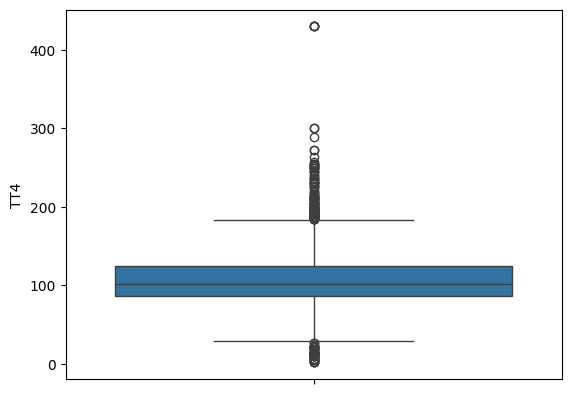

In [ ]:
# Box Plot
import seaborn as sns
sns.boxplot(data['TT4'])

In [ ]:
TT4 = data[(data["TT4"]>195)|(data["TT4"]<25)]


In [ ]:
TT4

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,Goitre,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Category
25,63.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,0.03,5.5,199.0,1.05,190.0,hyperthyroid
69,45.0,F,t,f,f,f,f,f,f,f,...,f,f,f,f,<function median at 0x79f227dc5480>,2.8,237.0,1.17,203.0,negative
88,39.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,<function median at 0x79f227dc5480>,0.4,11.0,1.24,8.9,negative
114,65.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,0.15,3.5,217.0,0.98,221.0,hyperthyroid
133,49.0,F,t,f,f,f,f,f,f,f,...,f,f,f,f,0.8,2.5,205.0,1.20,170.0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,20.0,M,f,f,f,f,f,f,f,f,...,f,f,f,f,0.015,4.8,22.0,NaN,NaN,negative
3046,41.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,0.2,3.8,253.0,1.24,204.0,negative
3047,31.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,<function median at 0x79f227dc5480>,NaN,196.0,0.94,209.0,negative
3048,25.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,<function median at 0x79f227dc5480>,0.7,21.0,1.10,19.0,hypothyroid


In [ ]:
data['TT4'] = np.where(data['TT4'] > 195, np.nan, data['TT4'])
data['TT4'] = np.where(data['TT4'] < 25, np.nan, data['TT4'])
data['TT4'].isnull().sum()

277

In [ ]:
data["TT4"] = data["TT4"].replace(np.nan, np.median)


# FTI

<Axes: ylabel='FTI'>

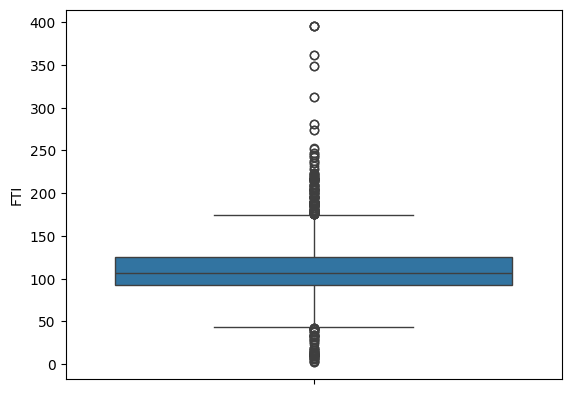

In [ ]:
# Box Plot
import seaborn as sns
sns.boxplot(data['FTI'])

In [ ]:
data['FTI'] = np.where(data['FTI'] > 195, np.nan, data['FTI'])
data['FTI'] = np.where(data['FTI'] < 35, np.nan, data['FTI'])
data['FTI'].isnull().sum()

415

In [ ]:
data["FTI"] = data["FTI"].replace(np.nan, np.median)


# T3

In [ ]:
T3 = data[(data["T3"]>4.5)]
data['T3'] = np.where(data['T3'] > 4.5, np.nan, data['T3'])


In [ ]:
data["T3"] = data["T3"].replace("?", np.median)


<Axes: ylabel='T3'>

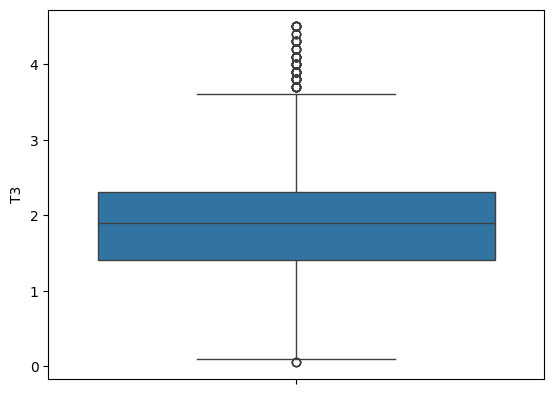

In [ ]:
# Box Plot
import seaborn as sns
sns.boxplot(data['T3'])


# T4U

In [ ]:
T4U = data[(data["T4U"]>1.5)]


In [ ]:
T4U

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,Goitre,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Category
30,34.0,F,f,f,f,f,t,f,f,f,...,f,f,f,f,0.035,2.5,119.0,1.55,76.0,negative
61,42.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,0.02,2.6,138.0,1.58,88.0,negative
95,26.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,2.0,NaN,137.0,1.63,84.0,negative
97,39.0,F,f,f,t,f,f,f,f,f,...,f,f,f,f,4.3,2.4,135.0,1.51,89.0,negative
122,31.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,7.8,2.0,159.0,1.51,105.0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2696,29.0,F,f,f,f,f,t,f,f,f,...,f,f,f,f,0.62,3.8,<function median at 0x79f227dc5480>,1.88,112.0,negative
2774,19.0,F,f,f,f,f,t,f,f,f,...,f,t,f,f,0.45,3.2,130.0,1.83,71.0,negative
2854,36.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,7.5,4.1,139.0,1.65,84.0,hypothyroid
2970,36.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,<function median at 0x79f227dc5480>,3.7,131.0,1.65,79.0,hypothyroid


In [ ]:
data['T4U'] = np.where(data['T4U'] > 1.5, np.nan, data['T4U'])


In [ ]:
data["T4U"] = data["T4U"].replace("?", np.median)


<Axes: ylabel='T4U'>

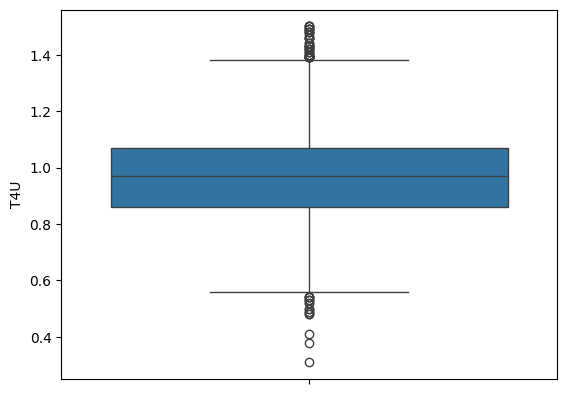

In [ ]:
# Box Plot
import seaborn as sns
sns.boxplot(data['T4U'])


# EDA

In [ ]:
data.Sex.value_counts()


Sex
F    2235
M     986
Name: count, dtype: int64

In [ ]:
data["Category"].value_counts()

Category
negative        2753
hypothyroid      220
sick             171
hyperthyroid      77
Name: count, dtype: int64

In [ ]:
thyroid_data = data[(data["Category"]!="negative")]


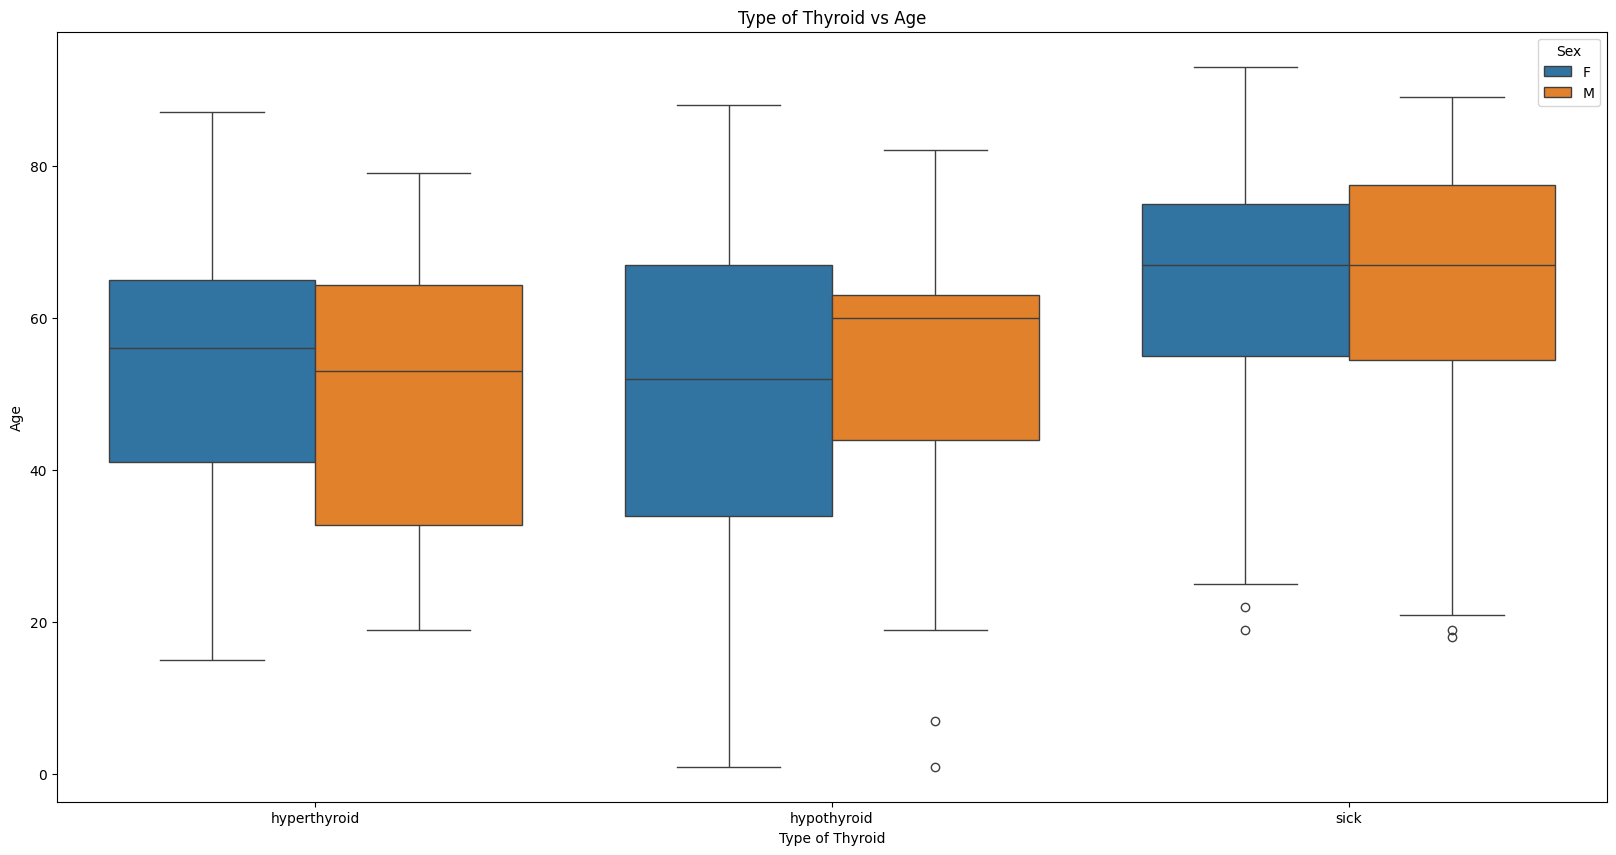

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x = "Category", y = "Age",hue = 'Sex', data = thyroid_data)
plt.title("Type of Thyroid vs Age")
plt.xlabel("Type of Thyroid")
plt.ylabel("Age")
plt.show()

([0, 1, 2],
 [Text(0, 0, 'hyperthyroid'), Text(1, 0, 'hypothyroid'), Text(2, 0, 'sick')])

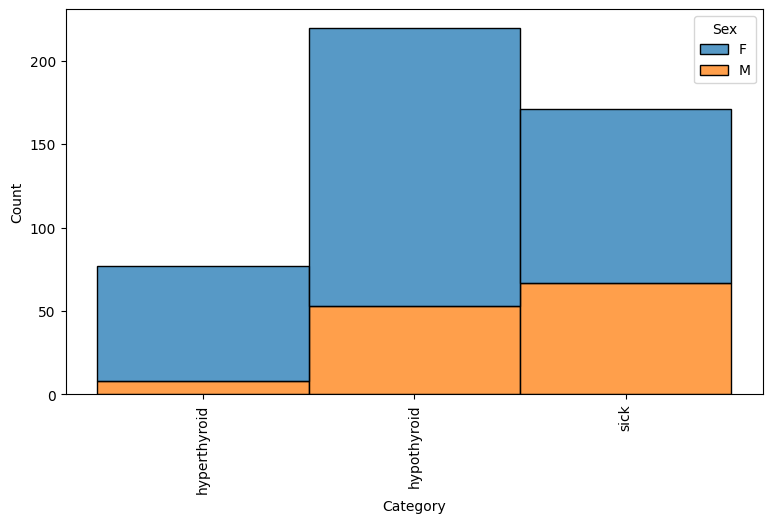

In [ ]:
plt.figure(figsize=(9,5))
sns.histplot(binwidth=0.5, x="Category", hue="Sex", data=thyroid_data, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")

([0, 1, 2],
 [Text(0, 0, 'hyperthyroid'), Text(1, 0, 'hypothyroid'), Text(2, 0, 'sick')])

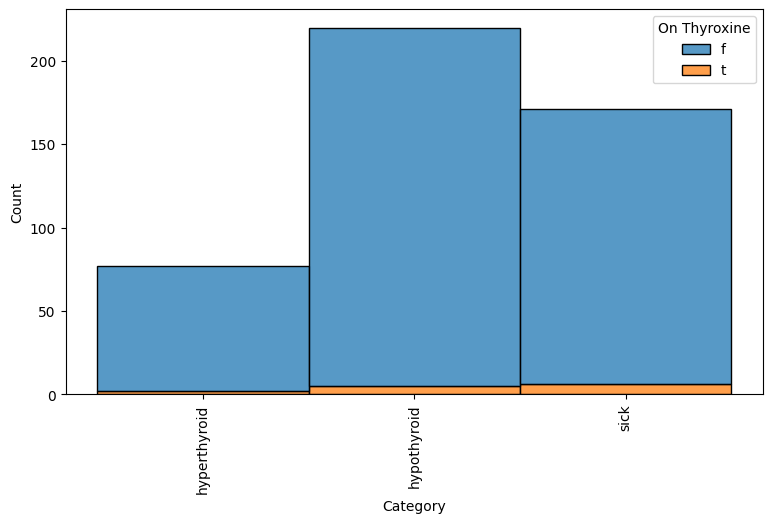

In [ ]:
plt.figure(figsize=(9,5))
sns.histplot(binwidth=0.5, x="Category", hue="On Thyroxine", data=thyroid_data, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")

([0, 1, 2],
 [Text(0, 0, 'hyperthyroid'), Text(1, 0, 'hypothyroid'), Text(2, 0, 'sick')])

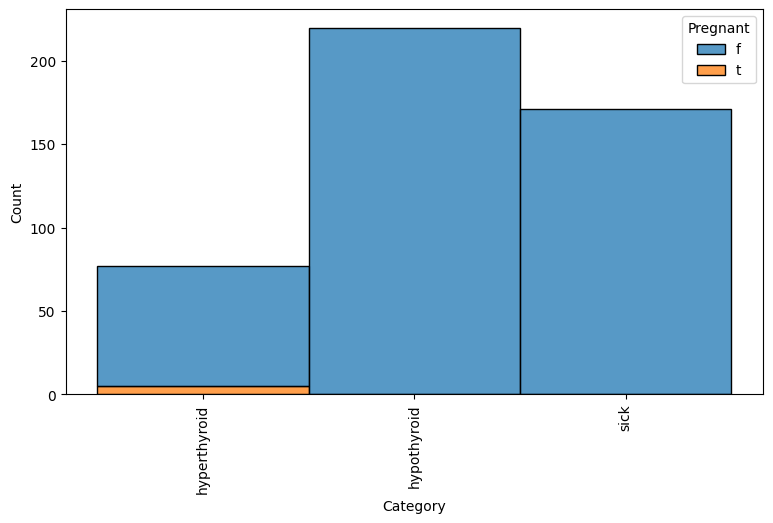

In [ ]:
plt.figure(figsize=(9,5))
sns.histplot(binwidth=0.5, x="Category", hue="Pregnant", data=thyroid_data, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")

([0, 1, 2],
 [Text(0, 0, 'hyperthyroid'), Text(1, 0, 'hypothyroid'), Text(2, 0, 'sick')])

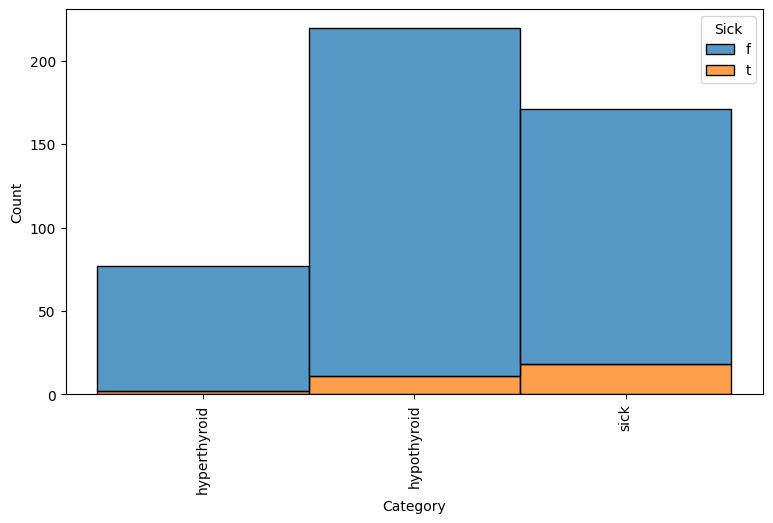

In [ ]:
plt.figure(figsize=(9,5))
sns.histplot(binwidth=0.5, x="Category", hue="Sick", data=thyroid_data, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")

([0, 1, 2],
 [Text(0, 0, 'hyperthyroid'), Text(1, 0, 'hypothyroid'), Text(2, 0, 'sick')])

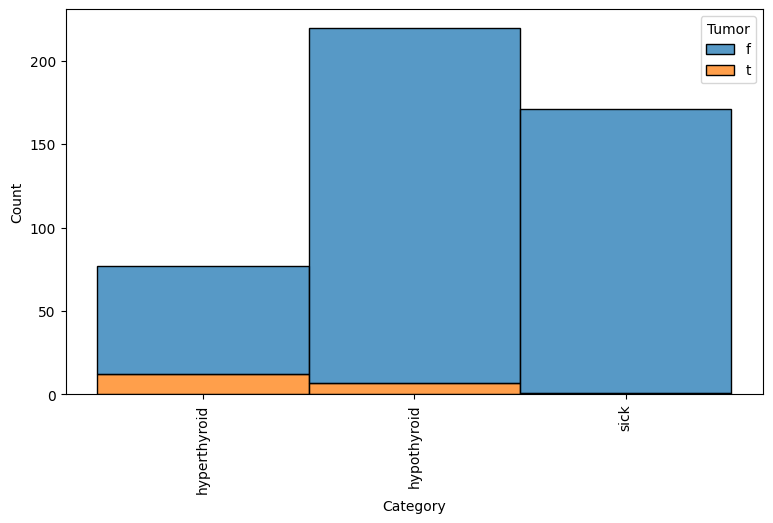

In [ ]:
plt.figure(figsize=(9,5))
sns.histplot(binwidth=0.5, x="Category", hue="Tumor", data=thyroid_data, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")

([0, 1, 2],
 [Text(0, 0, 'hyperthyroid'), Text(1, 0, 'hypothyroid'), Text(2, 0, 'sick')])

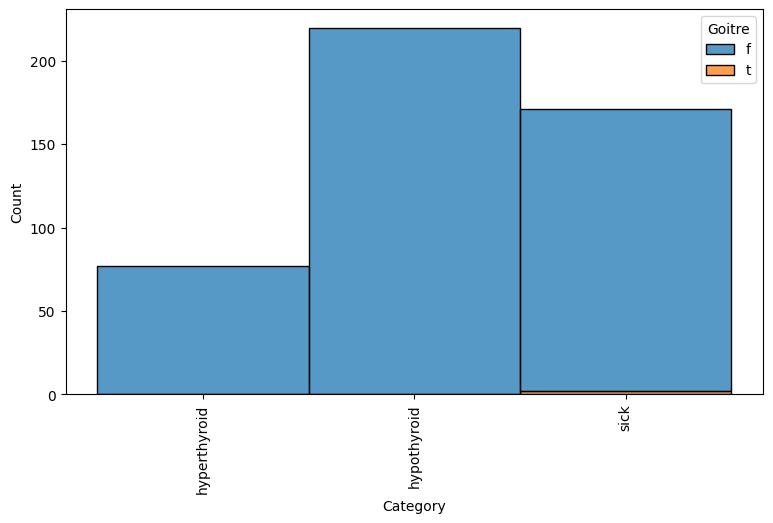

In [ ]:
plt.figure(figsize=(9,5))
sns.histplot(binwidth=0.5, x="Category", hue="Goitre", data=thyroid_data, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")

([0, 1, 2],
 [Text(0, 0, 'hyperthyroid'), Text(1, 0, 'hypothyroid'), Text(2, 0, 'sick')])

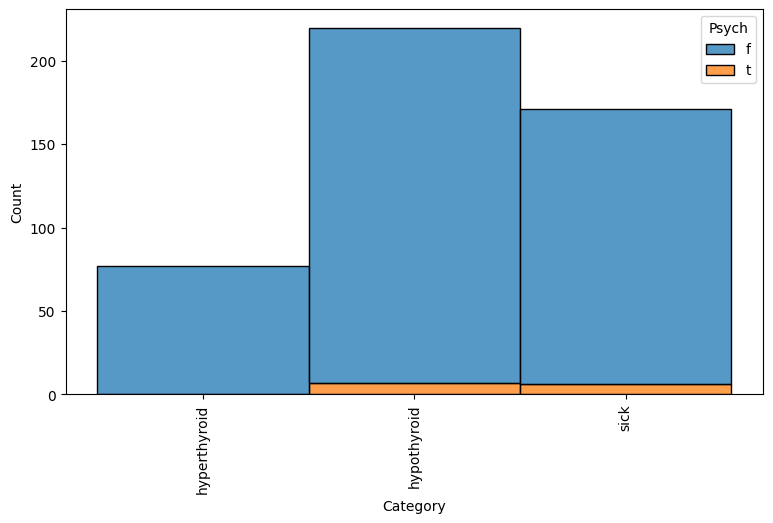

In [ ]:
plt.figure(figsize=(9,5))
sns.histplot(binwidth=0.5, x="Category", hue="Psych", data=thyroid_data, stat="count", multiple="stack")
plt.xticks(rotation = "vertical")

# Encoding the Data

In [ ]:
data['Sex'] = data['Sex'].replace({'F' : 0, 'M' : 1})
for column in data.columns:
    if  len(data[column].unique())==2:
        data[column] = data[column].replace({'f' : 0, 't' : 1})

In [ ]:
data.head()

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,Goitre,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Category
0,41.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.3,2.5,125.0,1.14,109.0,negative
1,23.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4.1,2.0,102.0,NaN,<function median at 0x79f227dc5480>,negative
2,46.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.98,NaN,109.0,0.91,120.0,negative
3,70.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.16,1.9,175.0,NaN,<function median at 0x79f227dc5480>,negative
4,70.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.72,1.2,61.0,0.87,70.0,negative


In [ ]:
data.isnull().sum()

Age                            1
Sex                            0
On Thyroxine                   0
Query on Thyroxine             0
On Antithyroid Medication      0
Sick                           0
Pregnant                       0
Thyroid Surgery                0
I131 Treatment                 0
Query Hypothyroid              0
Query Hyperthyroid             0
Lithium                        0
Goitre                         0
Tumor                          0
Hypopituitary                  0
Psych                          0
TSH                            0
T3                           630
TT4                            0
T4U                          347
FTI                            0
Category                       0
dtype: int64

In [ ]:
data["Age"].value_counts()

Age
59.0     91
70.0     83
60.0     82
63.0     79
73.0     79
         ..
5.0       1
455.0     1
10.0      1
6.0       1
92.0      1
Name: count, Length: 93, dtype: int64

In [ ]:
data["Sex"].value_counts()

Sex
F    2235
M     986
Name: count, dtype: int64

In [ ]:
data["Age"] = data["Age"].replace("?", np.nan)

In [ ]:
data.isnull().sum()

Age                            1
Sex                            0
On Thyroxine                   0
Query on Thyroxine             0
On Antithyroid Medication      0
Sick                           0
Pregnant                       0
Thyroid Surgery                0
I131 Treatment                 0
Query Hypothyroid              0
Query Hyperthyroid             0
Lithium                        0
Goitre                         0
Tumor                          0
Hypopituitary                  0
Psych                          0
TSH                          247
T3                           630
TT4                          142
T4U                          276
FTI                          274
Category                       0
dtype: int64

In [ ]:
data["TT4"].describe()

count    3079.000000
mean      107.807665
std        38.941172
min         2.000000
25%        86.000000
50%       102.000000
75%       125.000000
max       430.000000
Name: TT4, dtype: float64

In [ ]:
data.shape


(3221, 22)

In [ ]:
data.isnull().sum()


Age                            1
Sex                            0
On Thyroxine                   0
Query on Thyroxine             0
On Antithyroid Medication      0
Sick                           0
Pregnant                       0
Thyroid Surgery                0
I131 Treatment                 0
Query Hypothyroid              0
Query Hyperthyroid             0
Lithium                        0
Goitre                         0
Tumor                          0
Hypopituitary                  0
Psych                          0
TSH                          247
T3                           630
TT4                          142
T4U                          276
FTI                          274
Category                       0
dtype: int64

In [ ]:
data.describe()


,Age,TSH,T3,TT4,T4U,FTI
count,3220.000000,2974.000000,2591.000000,3079.000000,2945.000000,2947.000000
mean,52.532609,6.722840,1.902528,107.807665,0.989937,110.657550
std,20.381326,27.585818,0.781539,38.941172,0.194417,37.578197
min,1.000000,0.005000,0.050000,2.000000,0.310000,2.000000
25%,37.000000,0.450000,1.400000,86.000000,0.870000,92.000000
50%,55.000000,1.500000,1.900000,102.000000,0.970000,106.000000
75%,68.000000,3.300000,2.300000,125.000000,1.080000,125.000000
max,455.000000,478.000000,4.500000,430.000000,2.120000,395.000000


In [ ]:
high_age = data[data["Age"]>100]
high_age

,Age,Sex,On Thyroxine,Query on Thyroxine,On Antithyroid Medication,Sick,Pregnant,Thyroid Surgery,I131 Treatment,Query Hypothyroid,...,Goitre,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Category
1352,455.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.1,2.0,118.0,1.13,104.0,negative
